In [2]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [37]:
#https://datos.gob.mx/busca/dataset/cancer-de-la-mujer-sicam-cancer-de-mama
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\Mastografías 2017.csv'
daf = pd.read_csv(path, encoding='latin', error_bad_lines=False)
daf.head()

,Clave Entidad,Clave Jurisdicción,Clave Municipio,Edad,Resultado
0,1,1,1,57,Altamente Sugestiva a Malignidad
1,1,1,1,57,Altamente Sugestiva a Malignidad
2,1,1,1,57,Probablemente Benigna
3,1,1,1,57,Evaluación Adicional
4,1,1,1,57,Altamente Sugestiva a Malignidad


In [20]:
df_copy = daf.copy()
df_copy.head()


,Clave Entidad,Clave Jurisdicción,Clave Municipio,Edad,Resultado
0,1,1,1,57,Altamente Sugestiva a Malignidad
1,1,1,1,57,Altamente Sugestiva a Malignidad
2,1,1,1,57,Probablemente Benigna
3,1,1,1,57,Evaluación Adicional
4,1,1,1,57,Altamente Sugestiva a Malignidad


In [21]:
list(daf['Resultado'].unique())

['Altamente Sugestiva a Malignidad',
 'Probablemente Benigna',
 'Evaluación Adicional',
 'Benigna',
 'Anormalidad Sospechosa',
 'Riesgo Intermedio de Malignidad',
 'Baja Sospecha de Malignidad',
 'Negativa',
 'Riesgo Moderado de Malignidad']

In [22]:

keys = list(daf['Resultado'].unique())
vals = range(1,10)
act = dict(zip(keys, vals))
act

{'Altamente Sugestiva a Malignidad': 1,
 'Probablemente Benigna': 2,
 'Evaluación Adicional': 3,
 'Benigna': 4,
 'Anormalidad Sospechosa': 5,
 'Riesgo Intermedio de Malignidad': 6,
 'Baja Sospecha de Malignidad': 7,
 'Negativa': 8,
 'Riesgo Moderado de Malignidad': 9}

In [23]:
df_copy['Resultado'] = daf['Resultado'].map(act)
df_copy.head()

,Clave Entidad,Clave Jurisdicción,Clave Municipio,Edad,Resultado
0,1,1,1,57,1
1,1,1,1,57,1
2,1,1,1,57,2
3,1,1,1,57,3
4,1,1,1,57,1


In [24]:

#cargamos los datos de entrada
dataframe =df_copy
dataframe.head()
print(dataframe.tail(10))


        Clave Entidad  Clave Jurisdicción  Clave Municipio  Edad  Resultado
855007             32                   6               20    66          8
855008             32                   6               20    46          3
855009             32                   6               20    46          8
855010             32                   6               20    65          8
855011             32                   6               20    57          3
855012             32                   6               20    47          4
855013             32                   6               20    49          3
855014             32                   6               20    57          4
855015             32                   6               20    67          3
855016             32                   6               48    44          4


In [25]:

#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(['Resultado'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo


In [27]:

#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=4) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA


In [29]:

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada


shape of X_pca (855017, 4)
[0.30971561 0.28066606 0.2474005  0.16221784]
suma: 0.9999999999999998


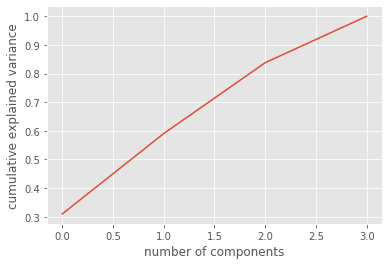

KeyError: 2

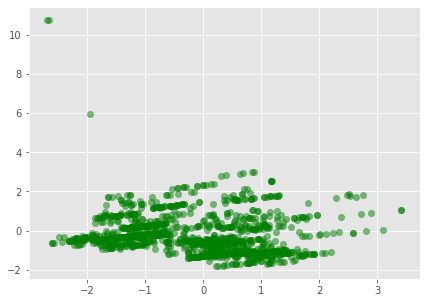

In [36]:

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['Resultado'].values
cdict={0:'red',1:'green'}
labl={0:'Edad',1:'Resultado'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()